In [2]:
import pandas as pd
import glob
import numpy as np

import datetime as dt
import plotly.graph_objects as go
import random

import imgkit
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
style.use('fivethirtyeight')
import scipy.stats as stats

from scipy.stats import pearsonr

# to change color palette from default to "deep"
#sns.set_palette(sns.color_palette("deep", 10))

In [ ]:
sns.palplot(sns.color_palette())

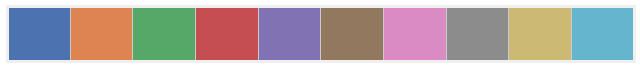

In [3]:
sns.palplot(sns.color_palette("deep", 10))

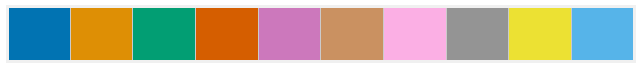

In [4]:
sns.palplot(sns.color_palette("colorblind", 10))

In [1]:
# We'll use SoCal 3 district pilot data set for our ROC analysis, 75 leaks total in study

df = pd.read_excel('3_District_PilotLeakData_PilotStudyAreaForGTI_2019.11.15.xlsx',
             sheet_name='Pilot Study 9-11-19_plusNov2019',
             header = 1)


NameError: name 'pd' is not defined

In [6]:
# Add a column for max. concentration across the 4 surfaces
df['max_conc'] = df[['c_substructure', 'c_barhole', 'c_crackinpavement', 'c_unpaved']].max(axis=1)
df['ave_conc'] = df[['c_substructure', 'c_barhole', 'c_crackinpavement', 'c_unpaved']].mean(axis=1)

In [7]:
df.head()

,OrdinalNumber,UniqueID,Type (see README Tab),DT_Threshold,SmallSubStructure_60,BarHole_80,CrackInPavement_20,UnpavedSurface_5,c_substructure,c_barhole,c_crackinpavement,c_unpaved,CriteriaTriggered,LeakRate(cfh),Base/District,Address,max_conc,ave_conc
0,45,45,LIRP-GHD,No,0,0,0,0,5.0,0.0,0.0,0.000,0,0.430132,OXNARD,5207 Cypress Rd,5.000,1.250000
1,46,46,LIRP-GHD,No,0,0,0,0,NaN,NaN,0.0,0.045,0,0.370357,REEDLY,1637 N Colombua Ave,0.045,0.022500
2,47,47,LIRP-GHD,Yes,0,0,0,1,NaN,NaN,0.0,6.000,1,30.702086,FELLOWS,24841 Westside Hwy (Westside HWY and Elm Ave),6.000,3.000000
3,48,48,LIRP-GHD,No,0,0,0,0,NaN,38.0,0.0,0.200,0,0.192196,FELLOWS,NW Corner HWY 33 & Cloud,38.000,12.733333
4,49,49,LIRP-GTI,No,0,0,0,0,NaN,NaN,4.6,0.330,0,3.660000,AZUSA,"1137 LA FLORA LN, GLENDORA, CA",4.600,2.465000


C:\Users\GBong\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0, 0.5, 'Frequency')

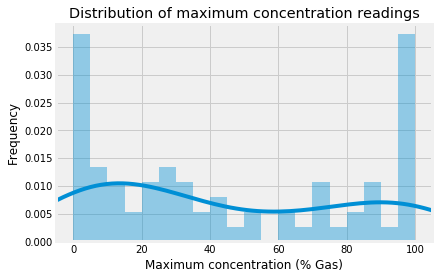

In [8]:
# Plot flow rate vs. max concentration measured in 4 surfaces

bin_count = 20

sns.distplot(df['max_conc'], bins = bin_count)
plt.title('Distribution of maximum concentration readings')
plt.xlim(-5, 105)
plt.xlabel('Maximum concentration (% Gas)')
plt.ylabel('Frequency')

# perform bootstrap to get the confidence interval /uncertainty on the relationship
# we define our binary outcome as leak > 5 or leak <= 5 scfh which will be derived using max_concentration value
# 
# Definitions of the 4 outcomes
# True positive is when max_conc > threshold and leak rate > 5 scfh
# True negative is when max_conc <= threshold and leak rate <= 5 scfh
# False positive is when max_conc > threshold but leak rate <= 5 scfh
# False negative is when max_conc <= threshold but leak rate > 5 scfh

# To start we set our threshold at an arbitrary value 2% gas
 
# Then we compute the numbers of TP, TN, FP, FN for that threshold

# Create a list of possible threshold values and compute the TP, TN, FP, FN for each threshold

# this will allow us to plot the ROC curve

# to plot the distribution of TP and TN, we calculate for each concentration value, the number of leaks >5 and <=5



Text(0, 0.5, 'Frequency')

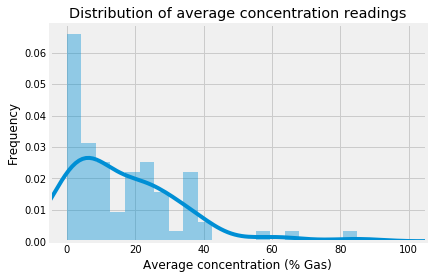

In [9]:
# plot distribution of average concentration readings
sns.distplot(df['ave_conc'], bins = bin_count)
plt.title('Distribution of average concentration readings')
plt.xlim(-5, 105)
plt.xlabel('Average concentration (% Gas)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Frequency distribution of leaks larger or smaller than 5 cfh')

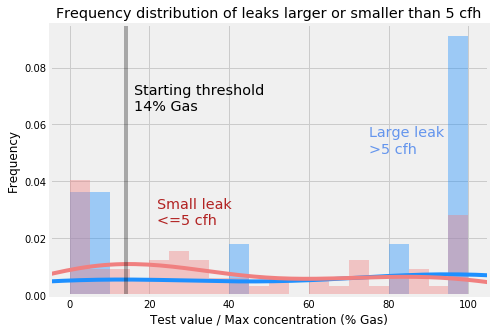

In [10]:
# Split the maximum concentration readings into >5 scfh and <= 5 categories
# Plots the "positive" and "negative" cases along the test value on the x-axis
# the test value/diagnostic tool is the maximum concentration here

lr_goal = 5

yes = df[df['LeakRate(cfh)'] > lr_goal]['max_conc'] 
no = df[df['LeakRate(cfh)'] <= lr_goal]['max_conc']

plt.figure(figsize=(7,5))
sns.distplot(yes, bins = bin_count, color='dodgerblue')
sns.distplot(no, bins = bin_count, color='lightcoral')

plt.annotate('Large leak\n>{:d} cfh'.format(lr_goal), xy= (75, 0.05), fontsize= 'x-large', color='cornflowerblue')
plt.annotate('Small leak\n<={:d} cfh'.format(lr_goal), xy=(22, 0.025), fontsize='x-large', color='firebrick')
plt.annotate('Starting threshold\n14% Gas', xy=(16, 0.065), fontsize='x-large', color='black')

plt.xlim(-5, 105)
plt.xlabel('Test value / Max concentration (% Gas)', fontsize='large')
plt.ylabel('Frequency',fontsize='large')

plt.axvline(x=14, alpha =0.3, color='black')
plt.title('Frequency distribution of leaks larger or smaller than {:d} cfh'.format(lr_goal))

Text(0.5, 1.0, 'Frequency distribution of leaks larger or smaller than 5 cfh')

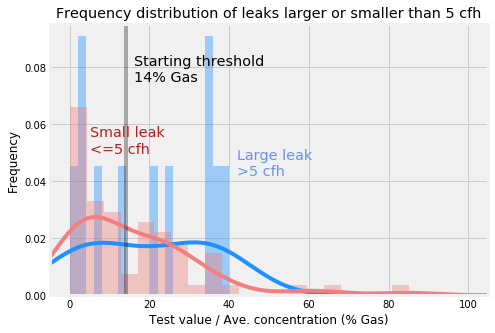

In [11]:
# Plots the "positive" and "negative" cases along the test value on the x-axis
# the test_value here is Average concentration

yes = df[df['LeakRate(cfh)'] > lr_goal]['ave_conc'] 
no = df[df['LeakRate(cfh)'] <= lr_goal]['ave_conc']

plt.figure(figsize=(7,5))
sns.distplot(yes, bins = bin_count, color='dodgerblue')
sns.distplot(no, bins = bin_count, color='lightcoral')

plt.annotate('Large leak\n>{:d} cfh'.format(lr_goal), xy= (42, 0.042), fontsize= 'x-large', color='cornflowerblue')
plt.annotate('Small leak\n<={:d} cfh'.format(lr_goal), xy=(5, 0.05), fontsize='x-large', color='firebrick')
plt.annotate('Starting threshold\n14% Gas', xy=(16, 0.075), fontsize='x-large', color='black')

plt.xlim(-5, 105)
plt.xlabel('Test value / Ave. concentration (% Gas)', fontsize='large')
plt.ylabel('Frequency',fontsize='large')

plt.axvline(x=14, alpha =0.3, color='black')
plt.title('Frequency distribution of leaks larger or smaller than {:d} cfh'.format(lr_goal))

In [12]:
threshold =14 #arbitrary starting threshold

def calc_stats_metrics(df, test_value, threshold, lr_goal):
    """ Calculates the true positive, true negative, false positive, false negative counts
        for a given threshold. test_value is the name of column that will be 
        compared with the threshold
    """
    tp = df[(df[test_value]>threshold) & (df['LeakRate(cfh)']>lr_goal)][test_value].count()
    tn = df[(df[test_value]<=threshold) & (df['LeakRate(cfh)']<=lr_goal)][test_value].count()
    fp = df[(df[test_value]>threshold) & (df['LeakRate(cfh)']<=lr_goal)][test_value].count()
    fn = df[(df[test_value]<=threshold) & (df['LeakRate(cfh)']>lr_goal)][test_value].count()
    
    return tp, tn, fp, fn

In [13]:
tp, tn, fp, fn = calc_stats_metrics(df, 'max_conc', threshold, lr_goal)
tpa, tna, fpa, fna = calc_stats_metrics(df, 'ave_conc', threshold, lr_goal)

In [14]:
tp, tn, fp, fn

(7, 19, 45, 4)

In [15]:
tpa, tna, fpa, fna

(6, 35, 29, 5)

In [16]:
# %%timeit -r10 -n5

# Create a new dataframe to store the performance metrics
# For 'max_conc' as the test value

df_pm = pd.DataFrame()
df_pm['threshold'] = [*range(-1, int(df['max_conc'].max(axis=0)) + 1, 1)] # threshold values -1-101 with an interval of 1

# Calculate the 4 metrics using calc_stats_metrics function, zip(*result) unpacks the values to 4 variables
# apply allows us to treat the data on a row basis. An inefficient way to do this is to create one column at a time

df_pm['tp'], df_pm['tn'], df_pm['fp'], df_pm['fn'] = zip(*df_pm.apply(lambda x: 
                                                    calc_stats_metrics(df, 'max_conc', x['threshold'], lr_goal), 
                                                    axis=1))

df_pm['total'] = df_pm[['tp', 'tn', 'fp', 'fn']].sum(axis=1)

# Calculate the TPR and FPR in the data frame
# TPR = TP/(TP + FN)
# FPR = FP/(TN + FP)
df_pm['tpr'] = df_pm['tp']/(df_pm['tp'] + df_pm['fn'])
df_pm['fpr'] = df_pm['fp']/(df_pm['tn'] + df_pm['fp'])

# calculate trapezoidal area under curve for each segment (0.5 * (average height) * base length)
df_pm['auc'] = 0.5*(df_pm['tpr'] + df_pm['tpr'].shift(-1)) * (df_pm['fpr'] - df_pm['fpr'].shift(-1))

df_pm.head()

,threshold,tp,tn,fp,fn,total,tpr,fpr,auc
0,-1,11,0,64,0,75,1.000000,1.000000,0.015625
1,0,11,1,63,0,75,1.000000,0.984375,0.104403
2,1,10,8,56,1,75,0.909091,0.875000,0.014205
3,2,10,9,55,1,75,0.909091,0.859375,0.014205
4,3,10,10,54,1,75,0.909091,0.843750,0.028409


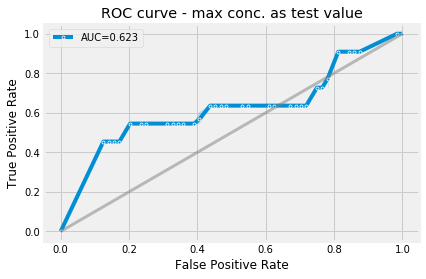

In [17]:
# Plot the receiver operating characteristic (ROC) curve
auc_max = df_pm['auc'].sum()

sns.lineplot(x='fpr', y='tpr',data=df_pm, marker='.')
plt.plot([0,1], [0,1], color='gray', alpha=0.5, linewidth=3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - max conc. as test value')
plt.legend(["AUC=%.3f"%auc_max])

plt.show()

In [18]:
# Create a new dataframe to store the performance metrics
# For 'ave_conc' as the test value

df_pa = pd.DataFrame()
df_pa['threshold'] = [*range(-1, int(df['ave_conc'].max(axis=0)) + 1, 1)] # threshold values -1-86 with an interval of 1

# Calculate the 4 metrics using calc_stats_metrics function, zip(*result) unpacks the values to 4 variables
# apply allows us to treat the data on a row basis. An inefficient way to do this is to create one column at a time

df_pa['tp'], df_pa['tn'], df_pa['fp'], df_pa['fn'] = zip(*df_pa.apply(lambda x: 
                                                    calc_stats_metrics(df, 'ave_conc', x['threshold'], lr_goal), 
                                                    axis=1))

df_pa['total'] = df_pa[['tp', 'tn', 'fp', 'fn']].sum(axis=1)

# Calculate the TPR and FPR in the data frame
# TPR = TP/(TP + FN)
# FPR = FP/(TN + FP)
df_pa['tpr'] = df_pa['tp']/(df_pa['tp'] + df_pa['fn'])
df_pa['fpr'] = df_pa['fp']/(df_pa['tn'] + df_pa['fp'])

# calculate trapezoidal area under curve for each segment (0.5 * (average height) * base length)
df_pa['auc'] = 0.5*(df_pa['tpr'] + df_pa['tpr'].shift(-1)) * (df_pa['fpr'] - df_pa['fpr'].shift(-1))

df_pa.head()

,threshold,tp,tn,fp,fn,total,tpr,fpr,auc
0,-1,11,0,64,0,75,1.000000,1.000000,0.015625
1,0,11,1,63,0,75,1.000000,0.984375,0.119318
2,1,10,9,55,1,75,0.909091,0.859375,0.042614
3,2,10,12,52,1,75,0.909091,0.812500,0.080966
4,3,9,18,46,2,75,0.818182,0.718750,0.000000


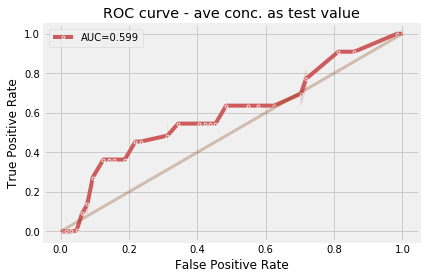

In [19]:
# Plot the receiver operating characteristic (ROC) curve
auc_ave = df_pa['auc'].sum()

sns.lineplot(x='fpr', y='tpr',data=df_pa, color = 'indianred', marker = '.')
plt.plot([0,1], [0,1], color='saddlebrown', alpha=0.3, linewidth=3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - ave conc. as test value')

plt.legend(["AUC=%.3f"%auc_ave])
plt.show()

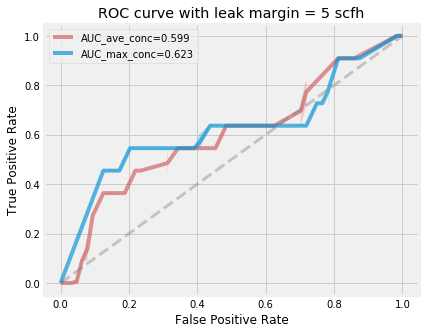

In [20]:
# plot both ave and max conc. AUC under the same graph
plt.figure(figsize=(6,5))

sns.lineplot(x='fpr', y='tpr',data=df_pa, color = 'indianred', alpha=0.65)
sns.lineplot(x='fpr', y='tpr',data=df_pm, alpha = 0.65)
plt.plot([0,1], [0,1], color='gray', alpha=0.4, linewidth=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve with leak margin = {:d} scfh'.format(lr_goal))

plt.legend(["AUC_ave_conc=%.3f"%auc_ave, "AUC_max_conc=%.3f"%auc_max])
plt.show()